# Pandas: filter, select, and timeline process

## P1. Load data (twitter account)

In [10]:
import pandas as pd
user_df = pd.read_csv("https://raw.githubusercontent.com/p4css/py4css/main/data/twitter_user1_hashed.csv")
user_df.head()

,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language
0,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,NaN,NaN,NaN,1,52,2017-08-30,zh-cn
1,919755217121316864,ailaiyi5,wuming11xia,NaN,NaN,NaN,0,0,2017-10-16,zh-cn
2,747292706536226816,牛小牛,gurevadona88,NaN,NaN,NaN,23949,52,2016-06-27,zh-cn
3,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,NaN,NaN,NaN,17,34,2016-08-08,es
4,907348345563303940,lishuishi,lishuishi,NaN,NaN,NaN,0,0,2017-09-11,zh-tw


### 1.1 Drop columns

In [11]:
user_df.drop(columns=['user_reported_location', 'user_profile_description', 'user_profile_url'], inplace=True)  
user_df.head()

,userid,user_display_name,user_screen_name,follower_count,following_count,account_creation_date,account_language
0,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,1,52,2017-08-30,zh-cn
1,919755217121316864,ailaiyi5,wuming11xia,0,0,2017-10-16,zh-cn
2,747292706536226816,牛小牛,gurevadona88,23949,52,2016-06-27,zh-cn
3,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,17,34,2016-08-08,es
4,907348345563303940,lishuishi,lishuishi,0,0,2017-09-11,zh-tw


In [12]:
user_df.columns
user_df.dtypes

userid                   object
user_display_name        object
user_screen_name         object
follower_count            int64
following_count           int64
account_creation_date    object
account_language         object
dtype: object

## P2. Tweets over time

### 2.1 Convert str to datetime

- https://datatofish.com/strings-to-datetime-pandas/
- https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.to_period.html
- https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases

In [13]:
user_df['account_creation_date'] = pd.to_datetime(user_df['account_creation_date'], format="%Y-%m-%d")
user_df.dtypes

userid                           object
user_display_name                object
user_screen_name                 object
follower_count                    int64
following_count                   int64
account_creation_date    datetime64[ns]
account_language                 object
dtype: object

In [14]:
# drug_df.groupby('pubMediaType')['pname', 'agency'].count()
user_df.groupby('account_creation_date')['userid'].count()

account_creation_date
2008-05-16    1
2008-07-31    1
2008-11-19    1
2009-01-29    1
2009-02-03    1
             ..
2019-04-28    1
2019-04-29    2
2019-05-03    8
2019-05-05    2
2019-05-07    2
Name: userid, Length: 289, dtype: int64

In [15]:
user_df['account_creation_year'] = user_df['account_creation_date'].apply(lambda x:x.year)
user_df.head()

,userid,user_display_name,user_screen_name,follower_count,following_count,account_creation_date,account_language,account_creation_year
0,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,1,52,2017-08-30,zh-cn,2017
1,919755217121316864,ailaiyi5,wuming11xia,0,0,2017-10-16,zh-cn,2017
2,747292706536226816,牛小牛,gurevadona88,23949,52,2016-06-27,zh-cn,2016
3,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,17,34,2016-08-08,es,2016
4,907348345563303940,lishuishi,lishuishi,0,0,2017-09-11,zh-tw,2017


In [17]:
# df['account_creation_ym'] = df['account_creation_date'].apply(lambda x:x.floor("M"))
# user_df['account_creation_ym'] = user_df['account_creation_date'].dt.to_period("M")
user_df['account_creation_ym'] = user_df['account_creation_date'].apply(lambda x:x.to_period('M'))
user_df.head()

,userid,user_display_name,user_screen_name,follower_count,following_count,account_creation_date,account_language,account_creation_year,account_creation_ym
0,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,1,52,2017-08-30,zh-cn,2017,2017-08
1,919755217121316864,ailaiyi5,wuming11xia,0,0,2017-10-16,zh-cn,2017,2017-10
2,747292706536226816,牛小牛,gurevadona88,23949,52,2016-06-27,zh-cn,2016,2016-06
3,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,17,34,2016-08-08,es,2016,2016-08
4,907348345563303940,lishuishi,lishuishi,0,0,2017-09-11,zh-tw,2017,2017-09


In [19]:
sum_df = user_df.groupby('account_creation_ym')['userid'].count().reset_index(name='n')
type(sum_df)
sum_df

,account_creation_ym,n
0,2008-05,1
1,2008-07,1
2,2008-11,1
3,2009-01,1
4,2009-02,1
...,...,...
98,2019-01,8
99,2019-02,12
100,2019-03,4
101,2019-04,4


## P3. Iterate each row of dataframe

In [20]:
for index, row in sum_df.iterrows():
    print(row['account_creation_ym'], row['n'])

2008-05 1
2008-07 1
2008-11 1
2009-01 1
2009-02 1
2009-03 1
2009-04 4
2009-05 1
2009-06 1
2009-07 4
2009-09 5
2009-10 1
2009-12 1
2010-01 2
2010-02 1
2010-03 2
2010-04 2
2010-06 4
2010-08 1
2010-09 1
2010-10 1
2010-11 2
2010-12 1
2011-01 1
2011-02 1
2011-03 3
2011-05 1
2011-06 2
2011-07 1
2011-08 4
2011-09 2
2011-11 3
2011-12 2
2012-01 2
2012-02 1
2012-03 2
2012-04 2
2012-06 1
2012-07 1
2012-08 2
2012-11 3
2012-12 3
2013-01 3
2013-02 4
2013-03 20
2013-04 1
2013-06 2
2013-07 2
2013-08 1
2013-09 1
2013-10 3
2013-11 3
2013-12 2
2014-01 1
2014-02 2
2014-03 1
2014-04 1
2014-05 3
2014-08 2
2014-10 1
2014-11 1
2015-01 3
2015-02 1
2015-04 2
2015-06 1
2015-07 3
2015-09 1
2015-10 5
2015-11 7
2015-12 6
2016-01 4
2016-02 3
2016-04 2
2016-05 1
2016-06 41
2016-07 9
2016-08 7
2016-09 1
2016-10 4
2016-11 1
2017-01 1
2017-02 2
2017-06 4
2017-07 11
2017-08 237
2017-09 28
2017-10 80
2017-11 47
2017-12 6
2018-01 1
2018-02 2
2018-03 9
2018-04 7
2018-07 15
2018-08 1
2018-10 8
2018-11 2
2018-12 10
2019-01 8


### 3.1 Plotting

https://www.w3schools.com/python/pandas/pandas_plotting.asp

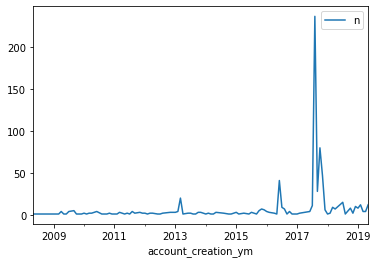

In [72]:
# %matplotlib widget
# %matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

sum_df.plot(x = 'account_creation_ym', y = 'n')

# plt.show()
plt.savefig('fig.pdf')

## P4. Twitter User Productivity

In [79]:
lang_count = user_df.groupby('account_language')["userid"].count()

In [108]:
toplot = lang_count.reset_index(name="n").sort_values('n', ascending=False)

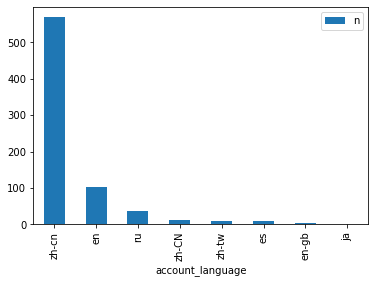

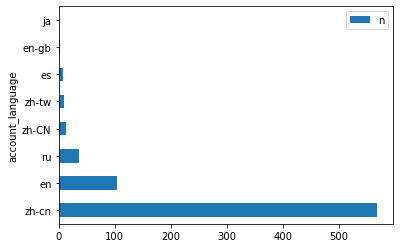

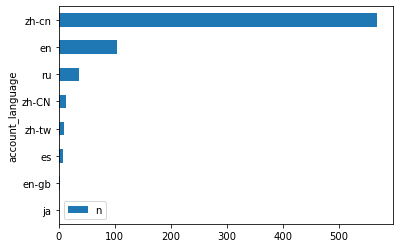

In [109]:
toplot.plot(kind="bar", x="account_language")
toplot.plot(kind="barh", x="account_language")
toplot.plot.barh(x="account_language").invert_yaxis()

plt.show()

## P5. Filter rows by column value (Very Important)

### Load data (drug ill-ad)

In [13]:
import pandas as pd
drug_df = pd.read_csv('https://raw.githubusercontent.com/p4css/py4css/main/data/drug_156_2.csv')
# drug_df
drug_df.columns


Index(['違規產品名稱', '違規廠商名稱或負責人', '處分機關', '處分日期', '處分法條', '違規情節', '刊播日期',
       '刊播媒體類別', '刊播媒體', '查處情形'],
      dtype='object')

In [14]:
drug_df

,違規產品名稱,違規廠商名稱或負責人,處分機關,處分日期,處分法條,違規情節,刊播日期,刊播媒體類別,刊播媒體,查處情形
0,維他肝,豐怡生化科技股份有限公司/朱O,NaN,03 31 2022 12:00AM,NaN,廣告內容誇大不實,02 2 2022 12:00AM,廣播電台,噶瑪蘭廣播電台股份有限公司,NaN
1,現貨澳洲Swisse ULTIBOOST維他命D片calcium vitamin VITAM...,張O雯/張O雯,NaN,01 21 2022 12:00AM,NaN,廣告違規,11 30 2021 12:00AM,網路,蝦皮購物,輔導結案
2,✈日本 代購 參天製藥 處方簽點眼液,蘇O涵/蘇O涵,NaN,01 25 2022 12:00AM,NaN,無照藥商,08 27 2021 12:00AM,網路,蝦皮購物,NaN
3,✈日本 代購 TSUMURA 中將湯 24天包裝,蘇O涵/蘇O涵,NaN,01 25 2022 12:00AM,NaN,無照藥商,08 27 2021 12:00AM,網路,蝦皮購物,輔導結案
4,_Salty.shop 日本代購 樂敦小花,曾O嫺/曾O嫺,NaN,02 17 2022 12:00AM,藥事法第27條,無照藥商,12 6 2021 12:00AM,網路,蝦皮購物,處分結案
...,...,...,...,...,...,...,...,...,...,...
2967,*健人館* 千鶴薄荷棒11g*2個,新東海藥局/ O聰敏,NaN,NaN,藥事法第27條,標示內容與規定不符,05 6 2020 12:00AM,網路,NaN,處分結案
2968,（現貨）GO LIVER DETOX 高之源 護肝排毒膠囊 120粒,連O毅/連O毅,NaN,06 30 2020 12:00AM,藥事法第27條,無照藥商,02 5 2020 12:00AM,網路,蝦皮購物,處分結案
2969,日本帶回樂敦小花新鮮貨,張O萍/張O萍,NaN,06 23 2020 12:00AM,NaN,難以判定產品屬性,03 10 2020 12:00AM,網路,蝦皮購物,輔導結案
2970,全新 洗眼杯 可平信 洗眼 小林製藥 小花 ROHTO Lycee 可搭配生理食鹽水 空汙 ...,盧O/盧O,NaN,09 4 2020 12:00AM,NaN,無照藥商,03 10 2020 12:00AM,網路,蝦皮購物,輔導結案


### 5.1  Detecting patterns in strings by `str.contains()`

[Python | Pandas Series.str.contains() - GeeksforGeeks](https://www.geeksforgeeks.org/python-pandas-series-str-contains/)

```python
pat = '假[\s\S]{0,6}新聞|假[\s\S]{0,6}消息|不實[\s\S]{0,6}新聞|不實[\s\S]{0,6}消息|假[\s\S]{0,6}訊息|不實[\s\S]{0,6}訊息'
filtered_comment = comment[comment['ccontent'].str.contains(pat=pat, na=False)]
```



In [15]:
pat = '代購|帶回'
filtered_drug_df = drug_df[drug_df['違規產品名稱'].str.contains(pat=pat, na=False)]
filtered_drug_df

,違規產品名稱,違規廠商名稱或負責人,處分機關,處分日期,處分法條,違規情節,刊播日期,刊播媒體類別,刊播媒體,查處情形
2,✈日本 代購 參天製藥 處方簽點眼液,蘇O涵/蘇O涵,NaN,01 25 2022 12:00AM,NaN,無照藥商,08 27 2021 12:00AM,網路,蝦皮購物,NaN
3,✈日本 代購 TSUMURA 中將湯 24天包裝,蘇O涵/蘇O涵,NaN,01 25 2022 12:00AM,NaN,無照藥商,08 27 2021 12:00AM,網路,蝦皮購物,輔導結案
4,_Salty.shop 日本代購 樂敦小花,曾O嫺/曾O嫺,NaN,02 17 2022 12:00AM,藥事法第27條,無照藥商,12 6 2021 12:00AM,網路,蝦皮購物,處分結案
9,現貨正品 Eve 快速出貨 日本代購 白兔60 藍兔 40 eve 金兔 EVE 兔子 娃娃...,張O恩/張O恩,NaN,03 4 2022 12:00AM,NaN,無照藥商,12 21 2021 12:00AM,網路,蝦皮拍賣網站,輔導結案
18,[海外代購]纈草根膠囊-120毫克-240粒-睡眠,江O君/江O君,NaN,03 15 2022 12:00AM,NaN,無照藥商,08 2 2021 12:00AM,網路,蝦皮購物,NaN
...,...,...,...,...,...,...,...,...,...,...
2947,「泰國代購🇹🇭」泰國🇹🇭Hirudoid強效去疤膏（預購）,魏O芝/魏O芝,NaN,06 5 2020 12:00AM,藥事法第27條,無照藥商,12 17 2019 12:00AM,網路,蝦皮購物,處分結案
2948,eBuy美國代購美国正品GNC银杏叶精华提高增强记忆力预防老年痴呆补脑健脑,蕭O雄/蕭O雄,NaN,NaN,NaN,無照藥商,03 9 2020 12:00AM,網路,蝦皮購物,NaN
2957,【現貨】H&H 久光 Hisamitsu酸痛舒緩貼布 120枚 140枚 痠痛 舒緩 貼布 ...,胡OO/胡OO,NaN,07 16 2020 12:00AM,藥事法第27條,無照藥商,02 27 2020 12:00AM,網路,蝦皮購物,處分結案
2965,美國代購 ，9:5%折扣落建髮洗，兩款都有,陳O鵬/陳O鵬,NaN,07 16 2020 12:00AM,NaN,藥品未申請查驗登記,04 16 2020 12:00AM,網路,樂購蝦皮股份有限公司,輔導結案


### 5.2 Filtered by arithemetic comparison

https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/

In [126]:
media_count = drug_df["刊播媒體"].value_counts()
print(type(media_count))
media_count = media_count.reset_index(name = "n").rename(columns={"index": "media"})
media_count

<class 'pandas.core.series.Series'>


,media,n
0,蝦皮購物,523
1,露天拍賣,443
2,PChome商店街,164
3,蝦皮拍賣,158
4,露天拍賣網站,119
...,...,...
415,臺中群健有線電視,1
416,世新有線電視股份有限公司,1
417,群健有線電視,1
418,金頻道有線電視事業股份有限公司,1


In [131]:
media_count.loc[media_count["n"]>5]

,media,n
0,蝦皮購物,523
1,露天拍賣,443
2,PChome商店街,164
3,蝦皮拍賣,158
4,露天拍賣網站,119
5,蝦皮拍賣網站,98
6,露天,63
7,奇摩拍賣網站,62
8,Yahoo!奇摩拍賣,60
9,奇摩拍賣,57


### 5.3 Filtered by one-of by `.isin()`

https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/

In [133]:
options = ['蝦皮購物', '露天拍賣'] 

media_count.loc[media_count["media"].isin(options)]

,media,n
0,蝦皮購物,523
1,露天拍賣,443


## P6. Plotting

In [135]:
pat1 = '代購|帶回'
pat2 = '蝦皮|露天|拍賣|YAHOO|商店街'
filtered_drug_df = drug_df.loc[drug_df['違規產品名稱'].str.contains(pat=pat1, na=False) & 
                               drug_df['刊播媒體'].str.contains(pat=pat2, na=False)]
filtered_drug_df

,違規產品名稱,違規廠商名稱或負責人,處分機關,處分日期,處分法條,違規情節,刊播日期,刊播媒體類別,刊播媒體,查處情形
2,✈日本 代購 參天製藥 處方簽點眼液,蘇O涵/蘇O涵,NaN,01 25 2022 12:00AM,NaN,無照藥商,08 27 2021 12:00AM,網路,蝦皮購物,NaN
3,✈日本 代購 TSUMURA 中將湯 24天包裝,蘇O涵/蘇O涵,NaN,01 25 2022 12:00AM,NaN,無照藥商,08 27 2021 12:00AM,網路,蝦皮購物,輔導結案
4,_Salty.shop 日本代購 樂敦小花,曾O嫺/曾O嫺,NaN,02 17 2022 12:00AM,藥事法第27條,無照藥商,12 6 2021 12:00AM,網路,蝦皮購物,處分結案
9,現貨正品 Eve 快速出貨 日本代購 白兔60 藍兔 40 eve 金兔 EVE 兔子 娃娃...,張O恩/張O恩,NaN,03 4 2022 12:00AM,NaN,無照藥商,12 21 2021 12:00AM,網路,蝦皮拍賣網站,輔導結案
18,[海外代購]纈草根膠囊-120毫克-240粒-睡眠,江O君/江O君,NaN,03 15 2022 12:00AM,NaN,無照藥商,08 2 2021 12:00AM,網路,蝦皮購物,NaN
...,...,...,...,...,...,...,...,...,...,...
2947,「泰國代購🇹🇭」泰國🇹🇭Hirudoid強效去疤膏（預購）,魏O芝/魏O芝,NaN,06 5 2020 12:00AM,藥事法第27條,無照藥商,12 17 2019 12:00AM,網路,蝦皮購物,處分結案
2948,eBuy美國代購美国正品GNC银杏叶精华提高增强记忆力预防老年痴呆补脑健脑,蕭O雄/蕭O雄,NaN,NaN,NaN,無照藥商,03 9 2020 12:00AM,網路,蝦皮購物,NaN
2957,【現貨】H&H 久光 Hisamitsu酸痛舒緩貼布 120枚 140枚 痠痛 舒緩 貼布 ...,胡OO/胡OO,NaN,07 16 2020 12:00AM,藥事法第27條,無照藥商,02 27 2020 12:00AM,網路,蝦皮購物,處分結案
2965,美國代購 ，9:5%折扣落建髮洗，兩款都有,陳O鵬/陳O鵬,NaN,07 16 2020 12:00AM,NaN,藥品未申請查驗登記,04 16 2020 12:00AM,網路,樂購蝦皮股份有限公司,輔導結案


In [138]:
toplot = filtered_drug_df['刊播媒體'].value_counts().reset_index(name = "n").rename(columns={"index": "media"})

### 6.1 About the matplotlib resolution

* change font type: `matplotlib.rcParams['font.family'] = ['Heiti TC']`


* https://stackoverflow.com/questions/39870642/matplotlib-how-to-plot-a-high-resolution-graph
* Best result: `plt.savefig('filename.pdf')`
* To png: `plt.savefig('filename.png', dpi=300)`

Adjust resolution
* For saving the graph: `matplotlib.rcParams['savefig.dpi'] = 300`
* For displaying the graph when you use plt.show(): `matplotlib.rcParams["figure.dpi"] = 100`



### 6.2 Plot with Chinese font

https://colab.research.google.com/github/willismax/matplotlib_show_chinese_in_colab/blob/master/matplotlib_show_chinese_in_colab.ipynb

```python
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
```


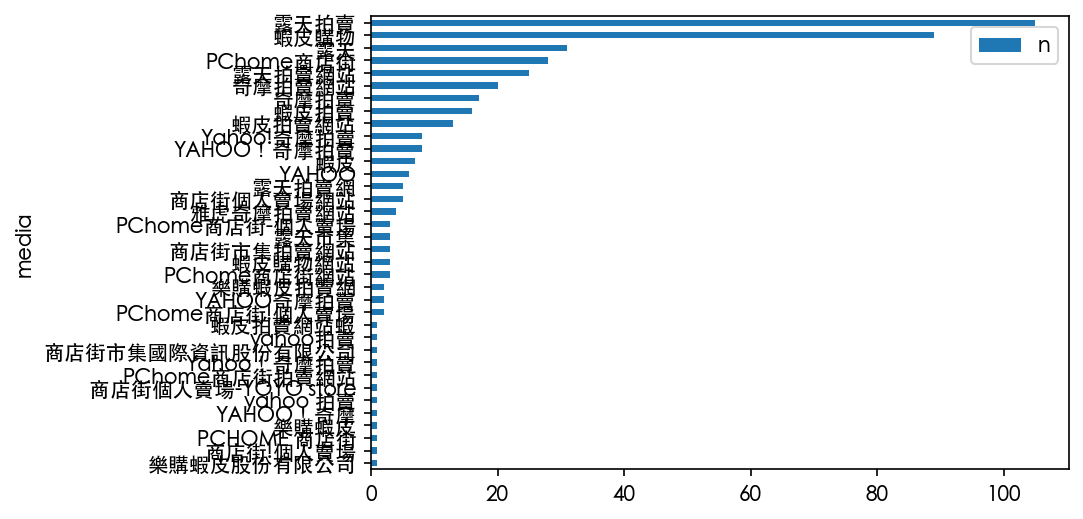

In [152]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['font.family'] = ['Heiti TC']

toplot.plot.barh(x="media").invert_yaxis()

# plt.show()

## P7. Pivot: groupby and summarize

[Reshaping and pivot tables — pandas 1.4.2 documentation (pydata.org)](https://pandas.pydata.org/docs/user_guide/reshaping.html)


### 7.1 Multiple factors to one new column

```python
count = raw.groupby(["authorDisplayName", "isSimplified2"]).size().reset_index(name="Time")
```


### 7.2 One column summarized to multiple columns

[https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns/53096340](https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns/53096340)

```python
print(
    animals
    .groupby('kind')
    .height
    .agg(
        min_height='min',
        max_height='max',
    )
)
#       min_height  max_height
# kind                        
# cat          9.1         9.5
# dog          6.0        34.0
```
---
```python
print(
    animals
    .groupby('kind')
    .agg(
        min_height=('height', 'min'),
        max_height=('height', 'max'),
        average_weight=('weight', np.mean),
    )
)
#       min_height  max_height  average_weight
# kind                                        
# cat          9.1         9.5            8.90
# dog          6.0        34.0          102.75
```

### 7.3 Multiple columns to multiple columns with different functions

[https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns/53096340](https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns/53096340)

In [21]:
import numpy as np
df = pd.DataFrame(np.random.rand(4,4), columns=list('abcd'))
df['group'] = [0, 0, 1, 1]
df

,a,b,c,d,group
0,0.665049,0.541810,0.451648,0.896288,0
1,0.575938,0.545449,0.991410,0.822755,0
2,0.798557,0.616866,0.267948,0.819010,1
3,0.532333,0.890252,0.566499,0.702033,1


In [22]:
df.groupby('group').agg({'a':['sum', 'max'], 
                         'b':'mean', 
                         'c':'sum', 
                         'd': lambda x: x.max() - x.min()})


a                   b         c         d
            sum       max      mean       sum  <lambda>
group                                                  
0      1.240987  0.665049  0.543629  1.443058  0.073533
1      1.330889  0.798557  0.753559  0.834448  0.116977